In [22]:
import sys
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
path_to_h5ad = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessSC_pipe/data/h5ad_datasets/processed/cpm/brain_sc_with_metadata_pc_cpm.h5ad"
tissue ="brain"
# Load adata object
adata =sc.read_h5ad(path_to_h5ad)

# Log the data to get logcpm
sc.pp.log1p(adata)

# # get the highly variable genes for later anlysis
# sc.pp.highly_variable_genes(adata,n_top_genes=3000)

# Subset adata for only highly variable genes
# adata = adata[:,adata.var.highly_variable]

In [24]:
# Perform 1 vs  unpaired all wilcoxon tests for each CT and gene
sc.tl.rank_genes_groups(adata, "Cell type", method='wilcoxon', use_raw=False)


/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
# Extract markers
df_ranked = sc.get.rank_genes_groups_df(adata = adata, group = None, log2fc_min=3)

In [ ]:
adata

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


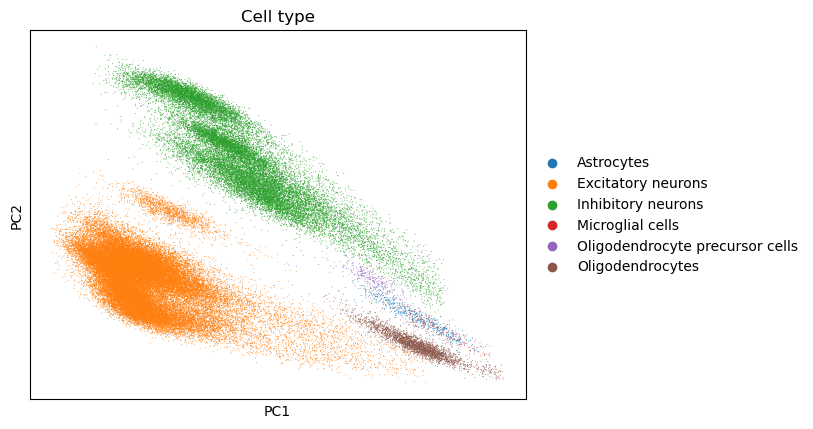

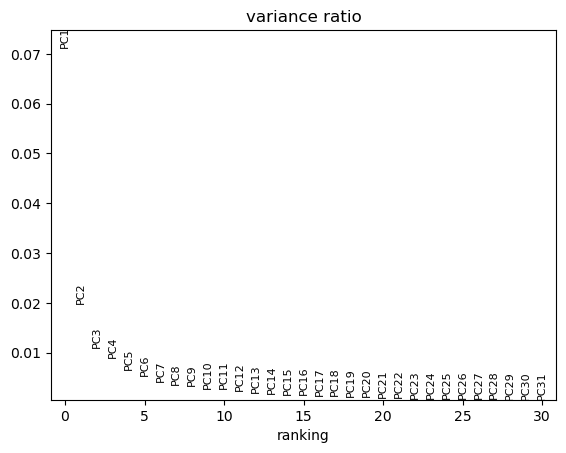

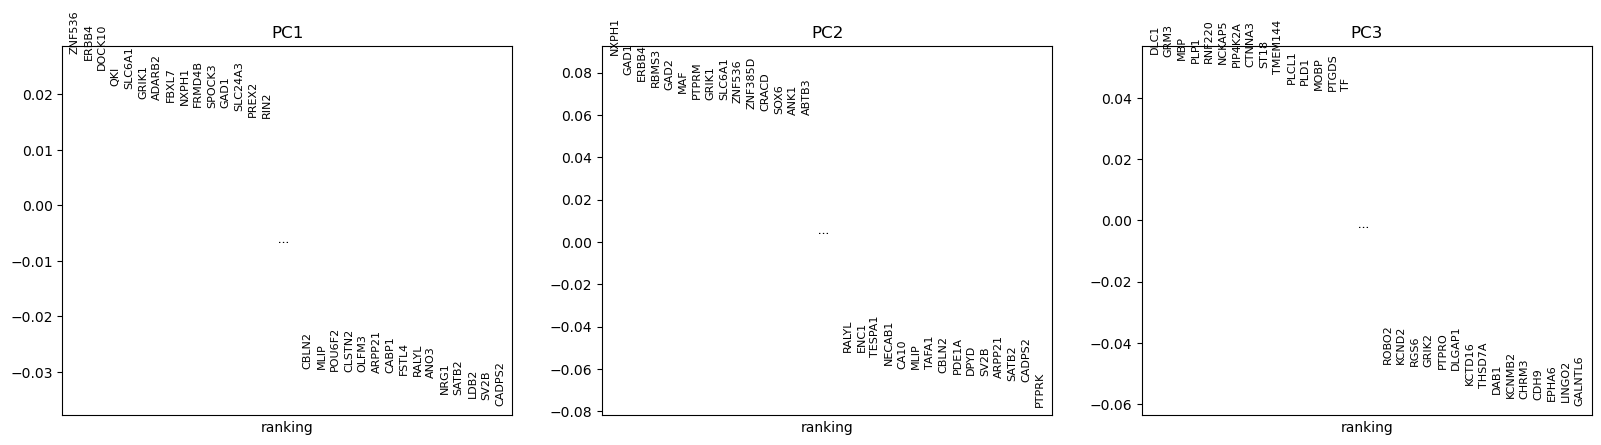

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


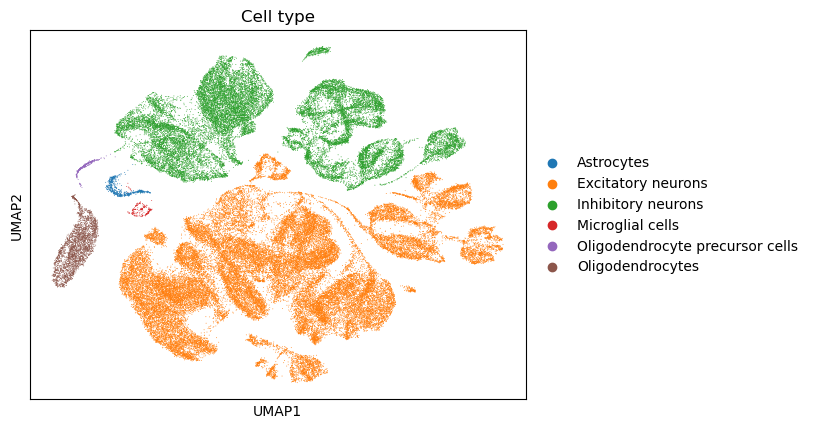

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


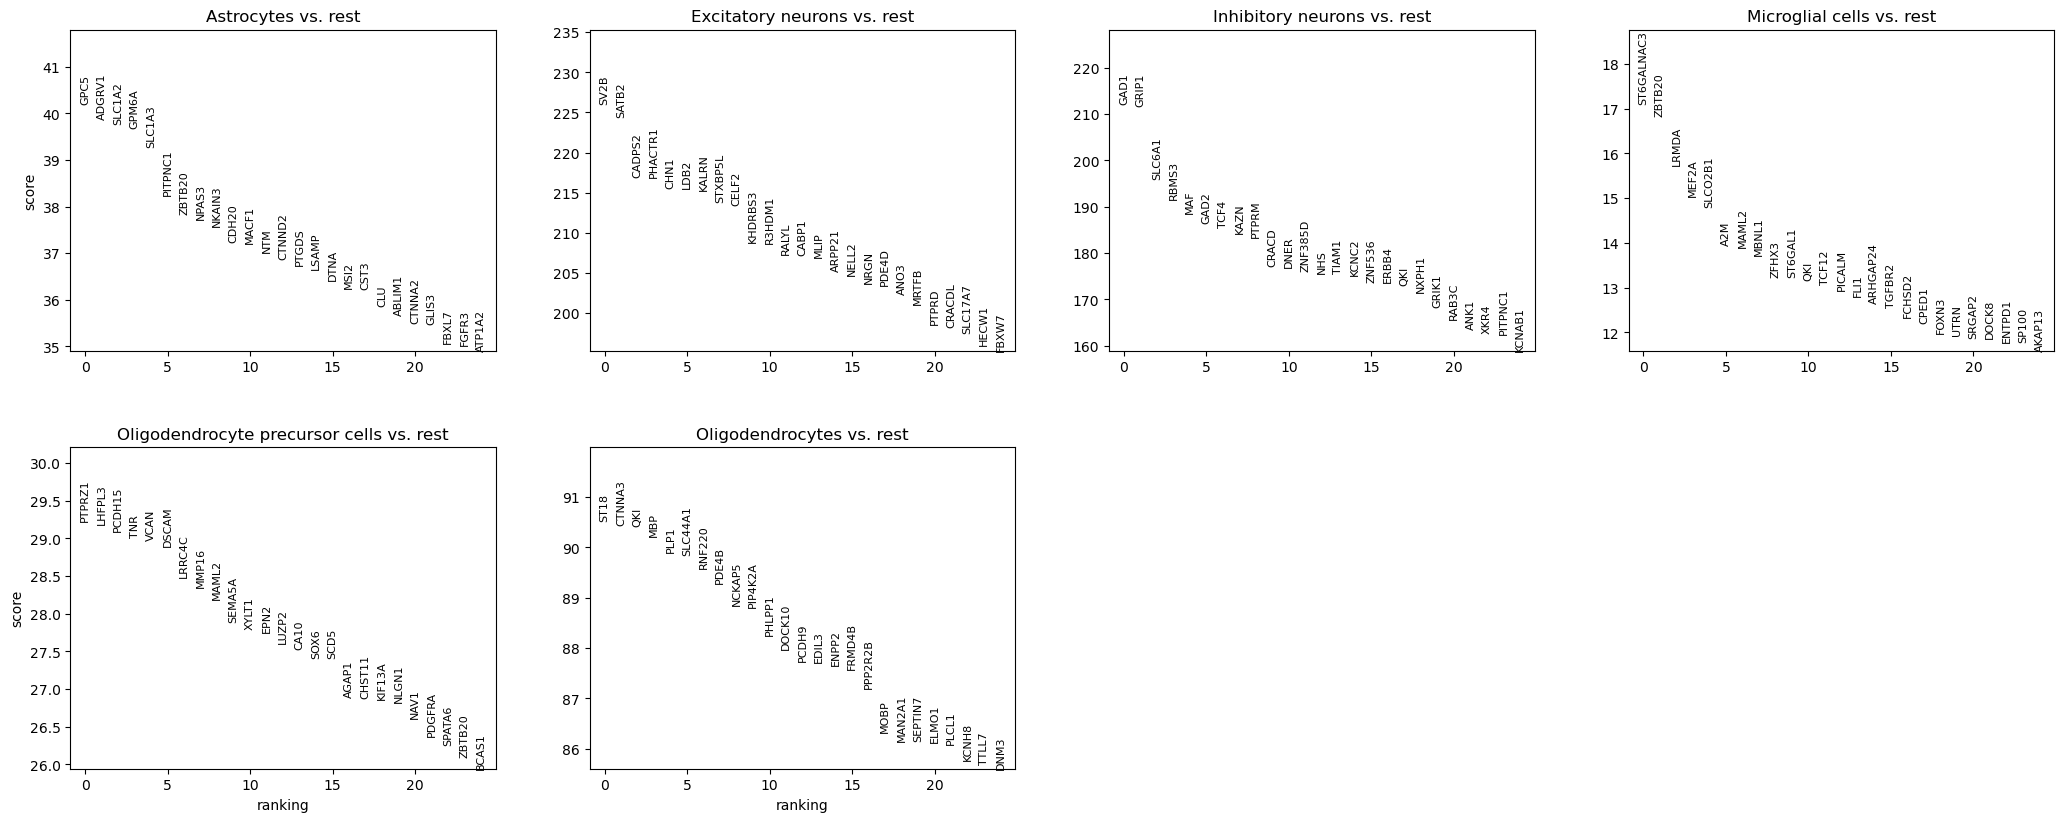

In [4]:

# Perform 1 vs  unpaired all wilcoxon tests for each CT and gene
sc.tl.rank_genes_groups(adata, "Cell type", method='wilcoxon', use_raw=False)

# Fix the index names to gene symbols
adata.var.reset_index(inplace=True)
adata.var_names = adata.var.loc[:,'hgnc_symbol'].values.tolist()

# Perform PCA and plot first 2 PCs
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='Cell type', save = f"{tissue}_pca.png")
# Plot Scree
sc.pl.pca_variance_ratio(adata, log=False, save = f"{tissue}_scree.png" )
# Plot loadings of first 3 PCs
sc.pl.pca_loadings(adata, save = f"{tissue}_loadings.png" )

# Calculate UMAP manifold and plot
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color='Cell type', save =f"{tissue}_umap.png" )

# Calculate Cell Type marker via wilcoxon tets
sc.tl.rank_genes_groups(adata, 'Cell type', method='wilcoxon')
# Plot top differentially expressed genes
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save = f"{tissue}_exp_marker_genes.png")



/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Figure size 640x480 with 0 Axes>

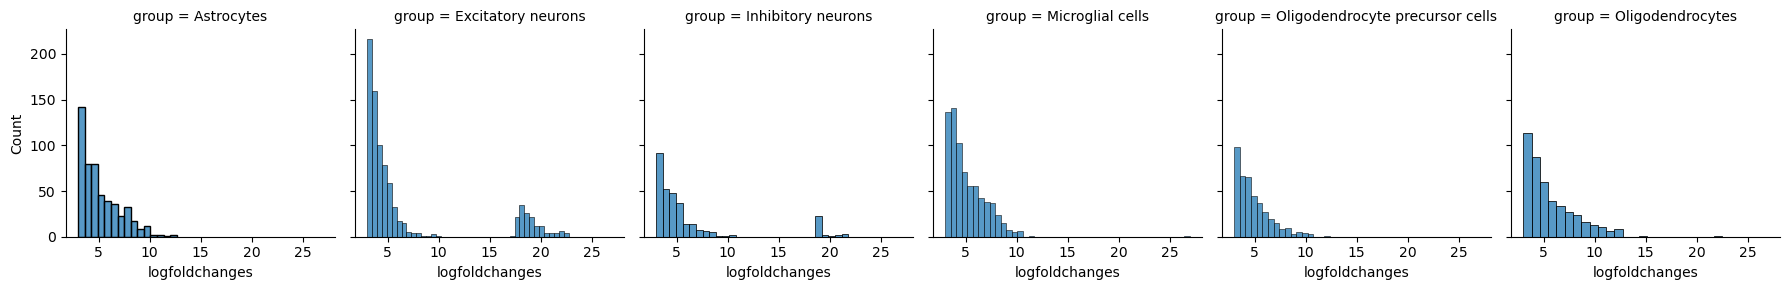

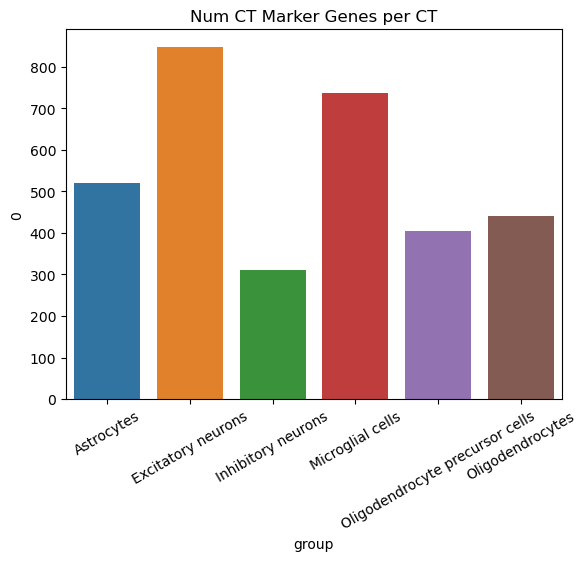

In [7]:
# Extract markers
df_ranked = sc.get.rank_genes_groups_df(adata = adata, group = None, log2fc_min=3)
# Add ensemble gene ids back on
df_ranked = df_ranked.merge(adata.var.loc[:,"ensembl_gene_id"], left_on = 'names', right_index=True)

# Graph log fcs of marker genes
plt.figure()
g = sns.FacetGrid(df_ranked, col="group")
g.map(sns.histplot, "logfoldchanges")
g.savefig(f"{tissue}_marker_dist.png")

plt.figure()
# Graph marker counts per ct
g2 = sns.barplot(df_ranked.groupby("group").size().reset_index(), x = 'group', y = 0)
# Rotate x-axis labels by 30 degrees
g2.set_xticklabels(g2.get_xticklabels(), rotation=30)
g2.set_title("Num CT Marker Genes per CT")
plt.savefig(f"{tissue}_marker_counts_per_ct.png")

# save marker genes
df_ranked.to_csv(f"{tissue}_markers.csv", index = None, float_format='%.2e')

In [26]:

def get_random_markers(adata, df_ranked:pd.DataFrame) -> pd.DataFrame:
    """subsample a df_ranked number of genes randomly. And then attribute them to the cell types in df_ranked


    Args:
        path_to_h5ad (str): path to adata single cell data
        df_ranked (pd.DataFrame): df of cell type markers previously gotten

    Returns:
        pd.DataFrame: A dataframe of randomly selected cell type marker genes where each cell type has the same number of random cell type marker genes as it does real ct marker genes
    """
    # adata = sc.read_h5ad(path_to_h5ad) # re-load the adata object because the previous was subset by highly variable genes
    # sc.pp.filter_genes(adata, min_counts=2)
    # sc.pp.filter_genes(adata, min_cells=5)

    # Remove marker genes from the adata object
    adata = adata[:, ~adata.var.index.isin(df_ranked.names.unique())]
    print(adata.shape)
    # Get number of genes to sample
    n_genes = df_ranked.shape[0]
    # subsample genes without replacement
    df_genes = adata.var.reset_index().sample(n=n_genes,random_state=20).loc[:,["ensembl_gene_id","hgnc_symbol"]]
    # Set the genes to be affiliated with the cell types in df_ranked
    df_genes['group'] = df_ranked.loc[:,'group'].values
    df_genes.columns =  ['ensembl_gene_id', 'names', 'group']
    df_genes = df_genes.loc[:,['group', 'names', 'ensembl_gene_id']] # re-organize
    return df_genes.reset_index(drop=True)
# Get Random Marker Genes
randoms = get_random_markers(adata, df_ranked=df_ranked)
randoms.to_csv(f"{tissue}_random_markers.csv", index = None)


(76180, 15015)


In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/deconvolutingBulk/data/dev/july_boot_29/3/markers/brain_sc_with_metadata_pc_cpm_markers.csv")

In [15]:
df.groupby("group").count().names.mean()

540.1666666666666

In [19]:
df.logfoldchanges.mean()

5.7032615226143

In [18]:
df

,group,names,scores,logfoldchanges,pvals,pvals_adj,ensembl_gene_id
0,Astrocytes,GPC5,40.210037,9.747755,0.000000e+00,0.000000e+00,ENSG00000179399
1,Astrocytes,ADGRV1,39.883785,8.850999,0.000000e+00,0.000000e+00,ENSG00000164199
2,Astrocytes,SLC1A2,39.764030,7.920350,0.000000e+00,0.000000e+00,ENSG00000110436
3,Oligodendrocyte precursor cells,SLC1A2,24.884047,4.500738,1.107434e-136,2.886494e-134,ENSG00000110436
4,Astrocytes,GPM6A,39.677914,3.083461,0.000000e+00,0.000000e+00,ENSG00000150625
...,...,...,...,...,...,...,...
3254,Oligodendrocytes,KCNK16,0.028147,3.639341,9.775447e-01,9.986185e-01,ENSG00000095981
3255,Oligodendrocytes,EN2,0.026911,3.099526,9.785304e-01,9.986185e-01,ENSG00000164778
3256,Oligodendrocytes,KRT74,0.026911,3.190781,9.785304e-01,9.986185e-01,ENSG00000170484
3257,Oligodendrocytes,DUOXA2,0.026911,3.582328,9.785304e-01,9.986185e-01,ENSG00000140274


In [17]:
len(df.names.unique())

2692

In [21]:
df.shape[0] - len(df.names.unique())

567